In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('train.csv')
display(df.head())
display(df.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.duplicated().sum()

0

In [4]:
df[df.duplicated(subset=['Name'],keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age']=df['Age'].replace(np.nan,np.mean(df['Age']))

In [7]:
df['Cabin'].value_counts().head()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: count, dtype: int64

In [8]:
df['Embarked'].value_counts().head()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
df['Embarked']=df['Embarked'].replace(np.nan,'S')

Text(0.5, 1.0, 'Survival Count')

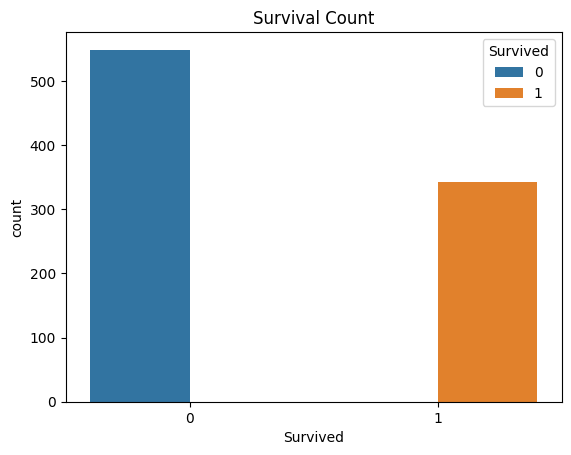

In [10]:
sns.countplot(x=df['Survived'],hue=df['Survived'])
plt.title('Survival Count')

Text(0.5, 1.0, 'Sex Count')

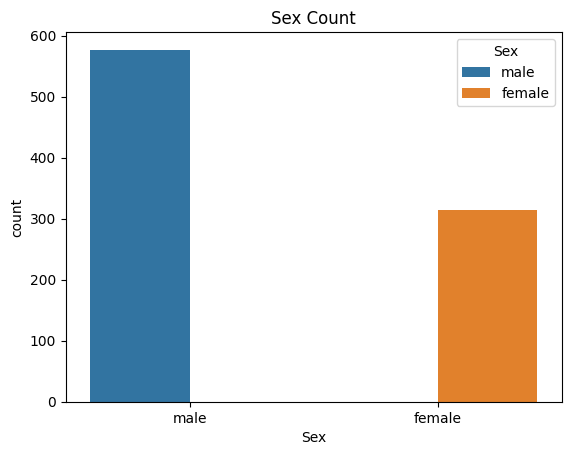

In [11]:
sns.countplot(x=df['Sex'],hue=df['Sex'])
plt.title('Sex Count')

Text(0.5, 1.0, 'Passenger Class Count')

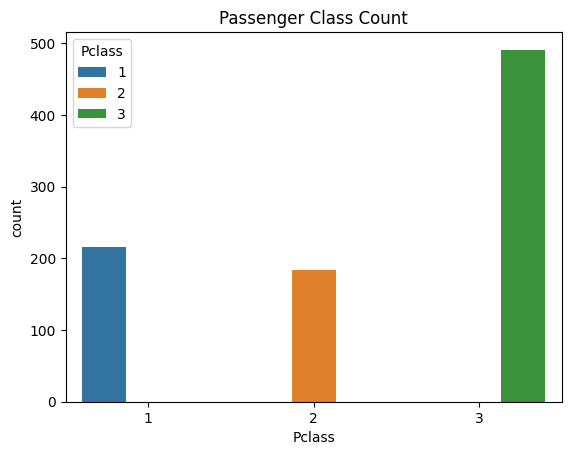

In [12]:
sns.countplot(x=df['Pclass'],hue=df['Pclass'])
plt.title('Passenger Class Count')

Text(0.5, 1.0, 'Embarked Count')

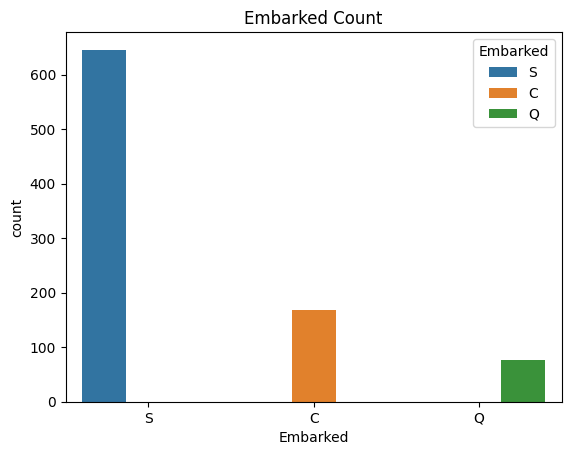

In [13]:
sns.countplot(x=df['Embarked'],hue=df['Embarked'])
plt.title('Embarked Count')

Text(0.5, 1.0, 'Siblings Count')

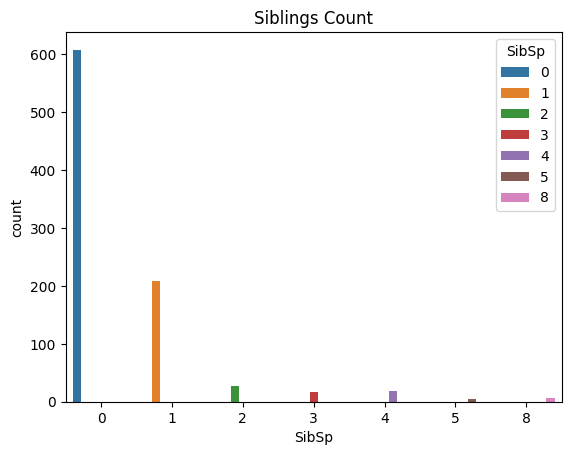

In [14]:
sns.countplot(x=df['SibSp'],hue=df['SibSp'])
plt.title('Siblings Count')

Text(0.5, 1.0, 'Parch Count')

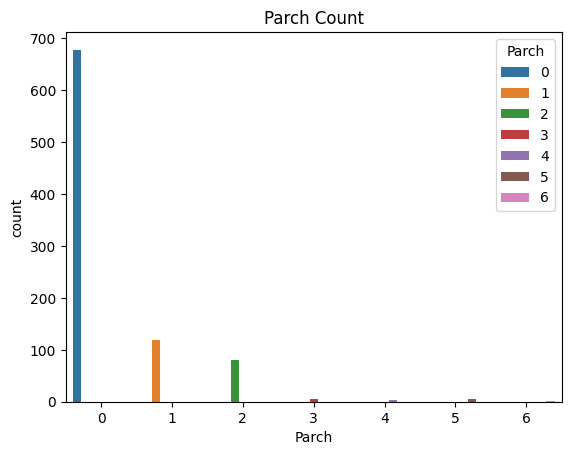

In [15]:
sns.countplot(x=df['Parch'],hue=df['Parch'])
plt.title('Parch Count')

Text(0.5, 1.0, 'Suvival Count By Sex')

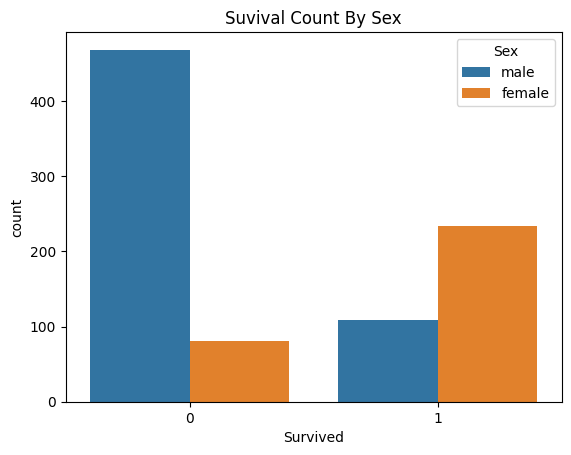

In [16]:
sns.countplot(x=df['Survived'],hue=df['Sex'])
plt.title('Suvival Count By Sex')

Text(0.5, 1.0, 'Passenger Class Count By Sex')

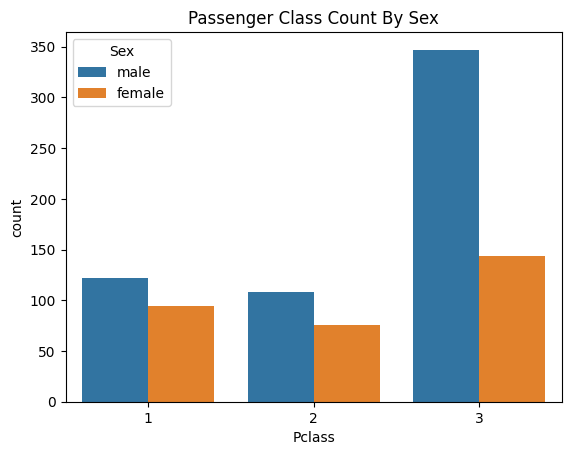

In [17]:
sns.countplot(x=df['Pclass'],hue=df['Sex'])
plt.title('Passenger Class Count By Sex')

Text(0.5, 1.0, 'Embarked Count By Sex')

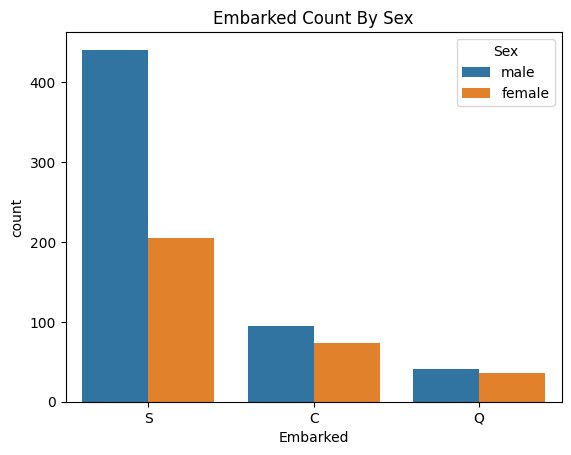

In [18]:
sns.countplot(x=df['Embarked'],hue=df['Sex'])
plt.title('Embarked Count By Sex')

Text(0.5, 1.0, 'Siblings Count By Sex')

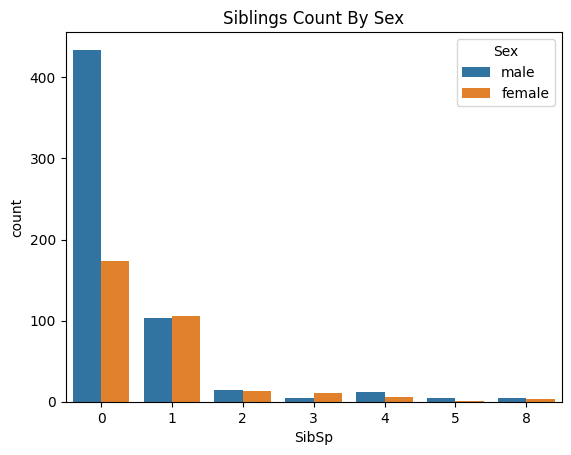

In [19]:
sns.countplot(x=df['SibSp'],hue=df['Sex'])
plt.title('Siblings Count By Sex')

Text(0.5, 1.0, 'Parch Count By Sex')

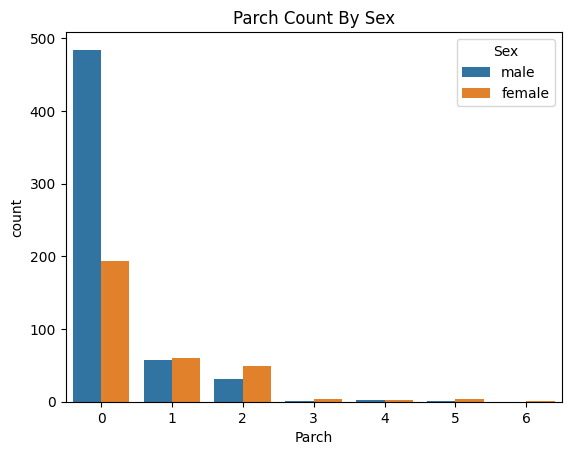

In [20]:
sns.countplot(x=df['Parch'],hue=df['Sex'])
plt.title('Parch Count By Sex')

Text(0.5, 1.0, 'Age Boxplot')

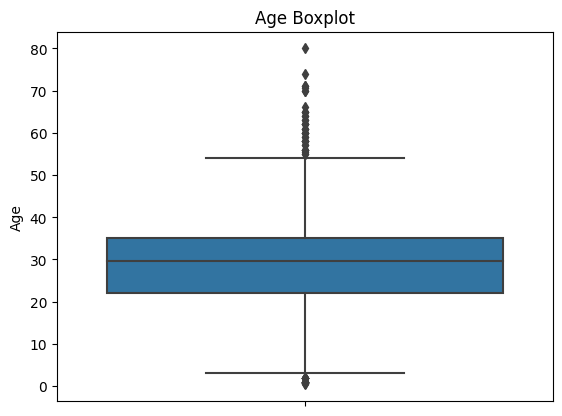

In [21]:
sns.boxplot(y=df['Age'])
plt.title('Age Boxplot')

In [22]:
# Scatter and density plots
def plotScatterMatrix(df2, plotSize, textSize):
    df2 = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df2 = df2.dropna('columns')
    df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df2)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df2 = df2[columnNames]
    ax = pd.plotting.scatter_matrix(df2, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df2.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

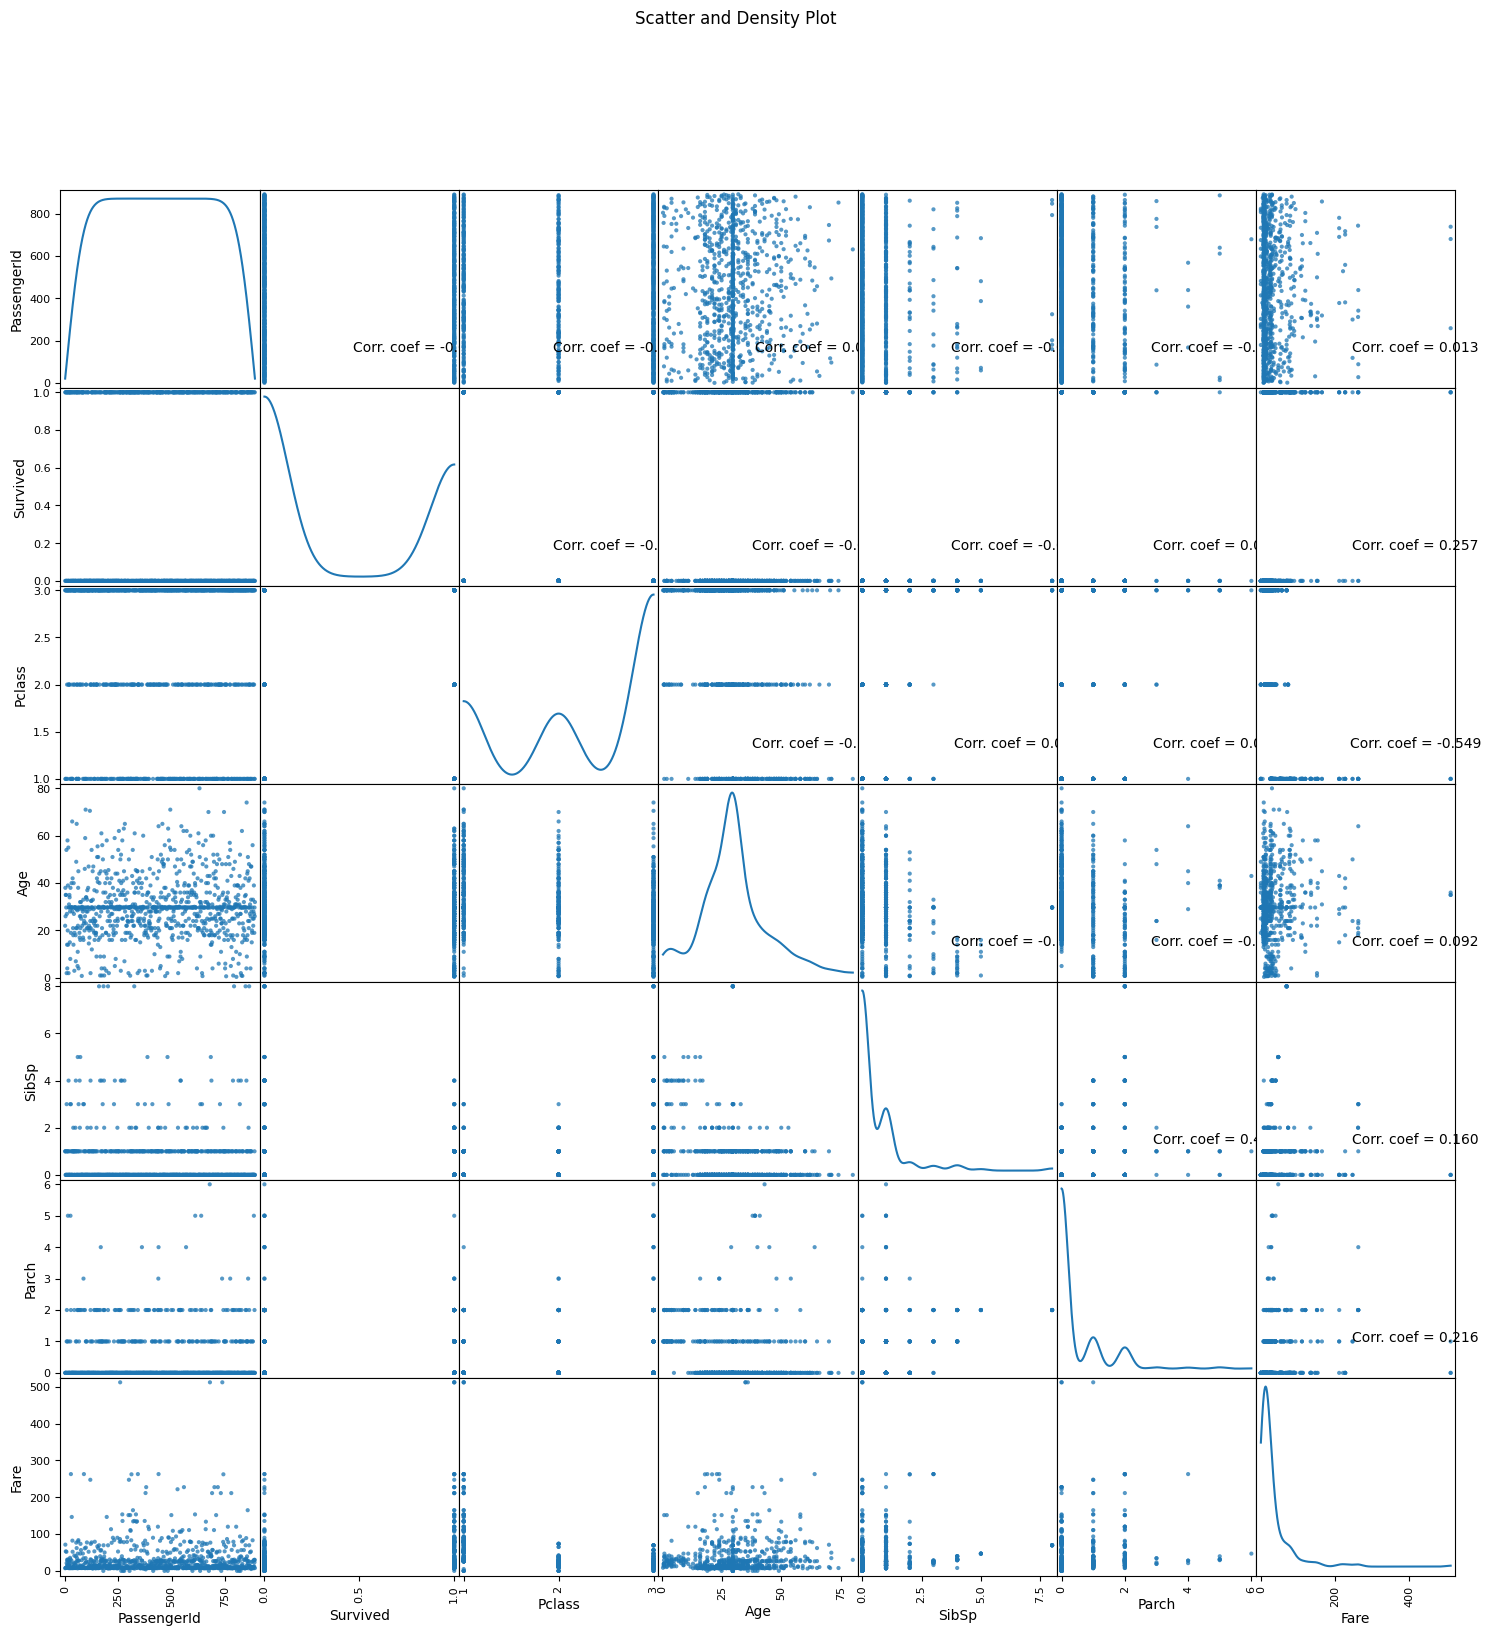

In [23]:
plotScatterMatrix(df, 18, 10)

<Axes: title={'center': 'Survivors by Age'}, xlabel='Age'>

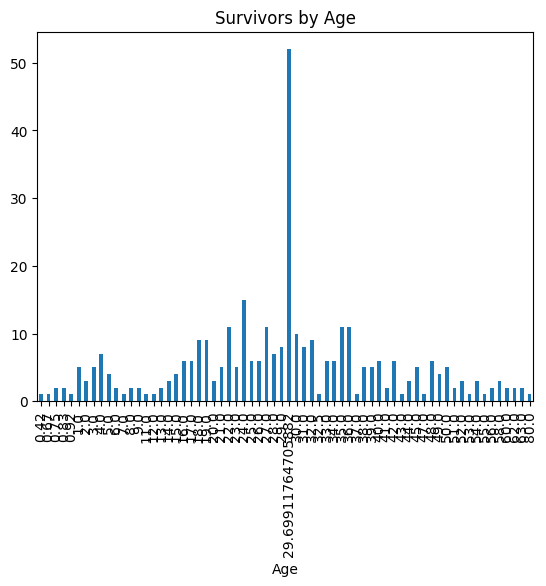

In [24]:
df[df['Survived']==1]['Age'].value_counts().sort_index().plot(kind='bar', title='Survivors by Age')

<Axes: title={'center': 'Passenger by Age Groups'}, xlabel='AgeBin'>

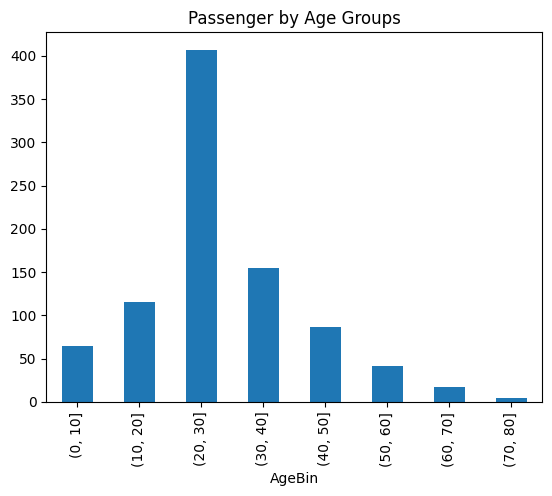

In [25]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeBin'] = pd.cut(df['Age'], bins)
df['AgeBin'].value_counts().sort_index().plot(kind='bar', title='Passenger by Age Groups')

<Axes: title={'center': 'Survivors by Age Groups'}, xlabel='AgeBin'>

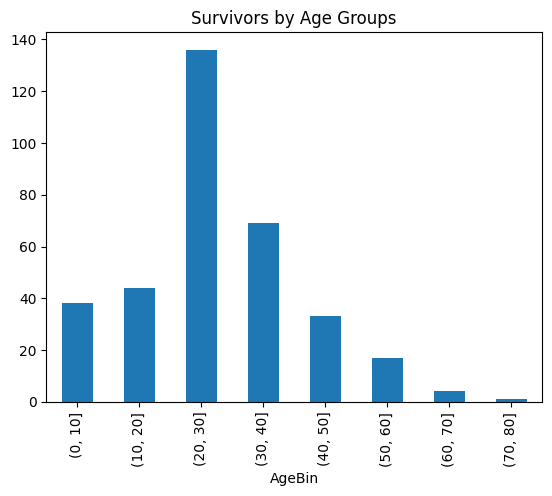

In [26]:
df[df['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar', title='Survivors by Age Groups')

<Axes: title={'center': 'Death by Age Groups'}, xlabel='AgeBin'>

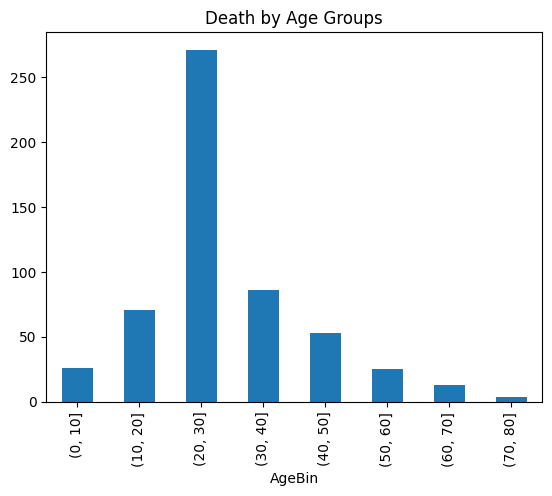

In [27]:
df[df['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar', title='Death by Age Groups')

Survived,0,1
AgeBin,,
"(0, 10]",26,38
"(10, 20]",71,44
"(20, 30]",271,136
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 70]",13,4
"(70, 80]",4,1


<Axes: title={'center': 'Survivors by Age Group'}, xlabel='Age Group', ylabel='Count'>

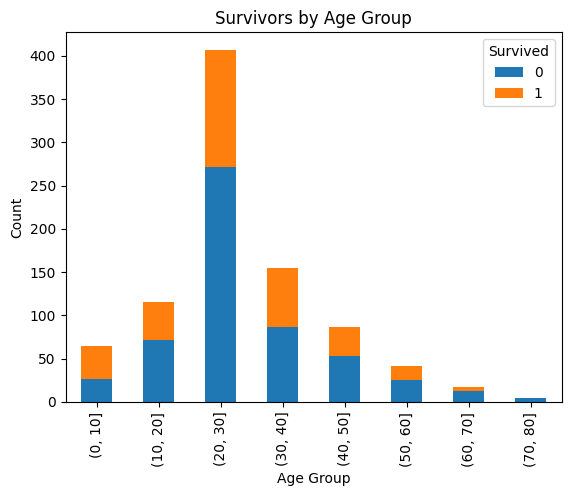

In [28]:
a = df.filter(['AgeBin', 'Survived'])
b = a.pivot_table(index='AgeBin', columns=['Survived'], aggfunc=len)
display(b)
b.plot(kind='bar',stacked = True, xlabel="Age Group", ylabel="Count", title = 'Survivors by Age Group')

<Axes: title={'center': 'Number of Male Survivors and Death'}, xlabel='Male Survivor'>

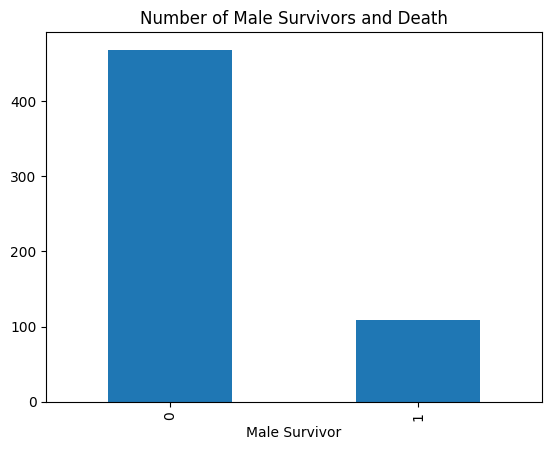

In [29]:
df[df['Sex']=='male']['Survived'].value_counts().plot(kind='bar', xlabel= 'Male Survivor', title= 'Number of Male Survivors and Death')

<Axes: title={'center': 'Number of Female Survivors and Death'}, xlabel='Female Survivor'>

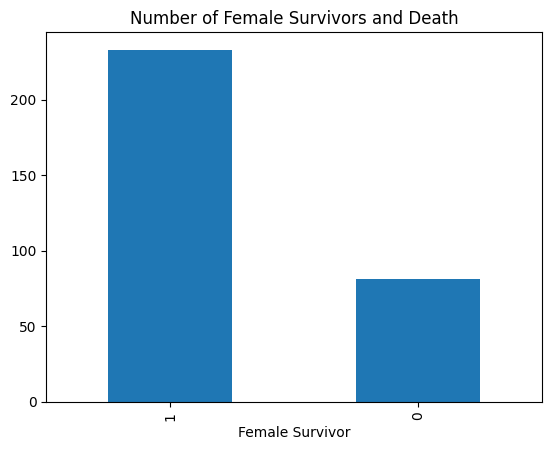

In [30]:
df[df['Sex']=='female']['Survived'].value_counts().plot(kind='bar', xlabel= 'Female Survivor', title= 'Number of Female Survivors and Death')

<Axes: title={'center': 'Male Survivors Separated by Cabin Class'}, xlabel='Male Survivor'>

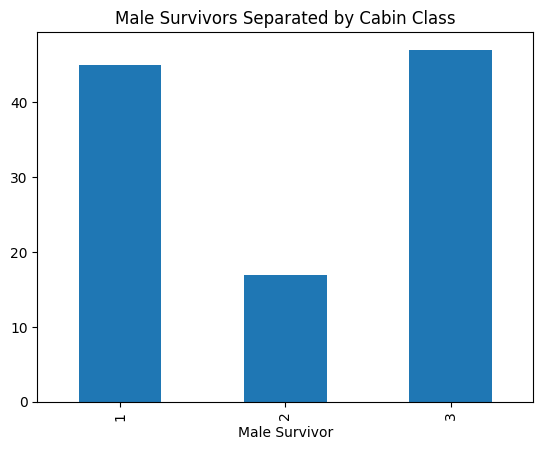

In [31]:
df[(df['Sex']=='male') & (df['Survived']== 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', xlabel= 'Male Survivor', title= 'Male Survivors Separated by Cabin Class')

<Axes: title={'center': 'Female Survivors Separated by Cabin Class'}, xlabel='Female Survivor'>

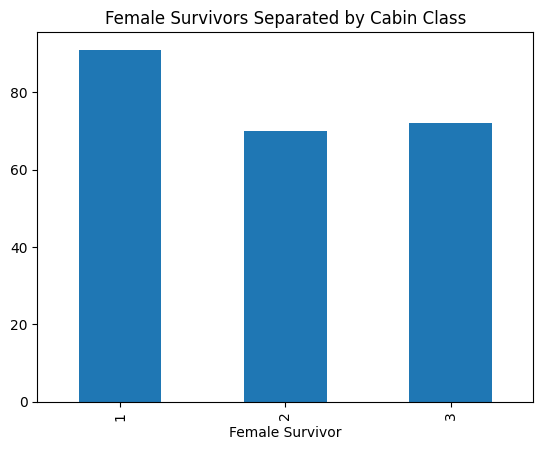

In [32]:
df[(df['Sex']=='female') & (df['Survived']== 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', xlabel= 'Female Survivor', title= 'Female Survivors Separated by Cabin Class')

## Conclusion
* Majority of survivors are female
    + Majority are from 1st class but 2nd and 3rd class is about the even
    + Majority of male survivors are from 1st and 3rd cabin
* Majority of survivors are from 1st and 3rd class cabins
* The age of majority survivors range from 20-40
    + The survival rate decreases as the passengers get younger and older
* The age distribution of the passengers is a normal type
    + Survival and death distribution is a a reflection of the total number of passengers 

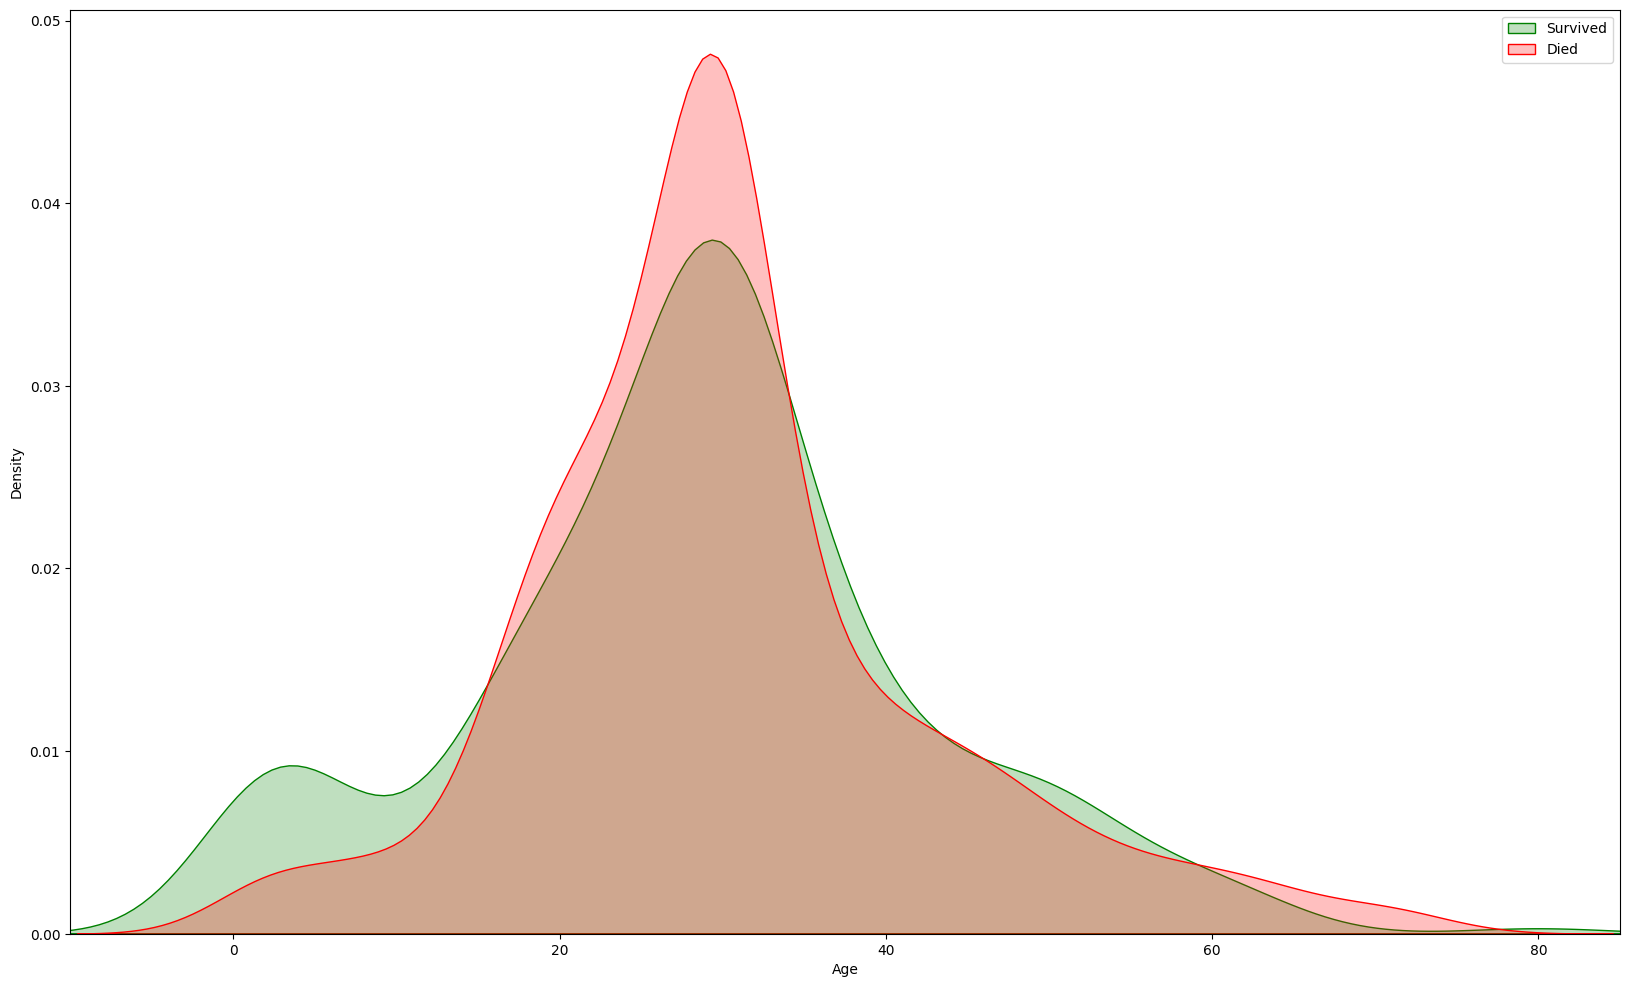

In [33]:
# Exploratory Data Analysis (EDA)

# AGE EDA

plt.figure(figsize=(20,12))
# Survived
sns.kdeplot(df['Age'][df.Survived==1],color='green',fill=True)

sns.kdeplot(df['Age'][df.Survived==0],color='red',fill=True)
plt.legend(['Survived','Died'])
plt.xlim(-10,85)
plt.show()

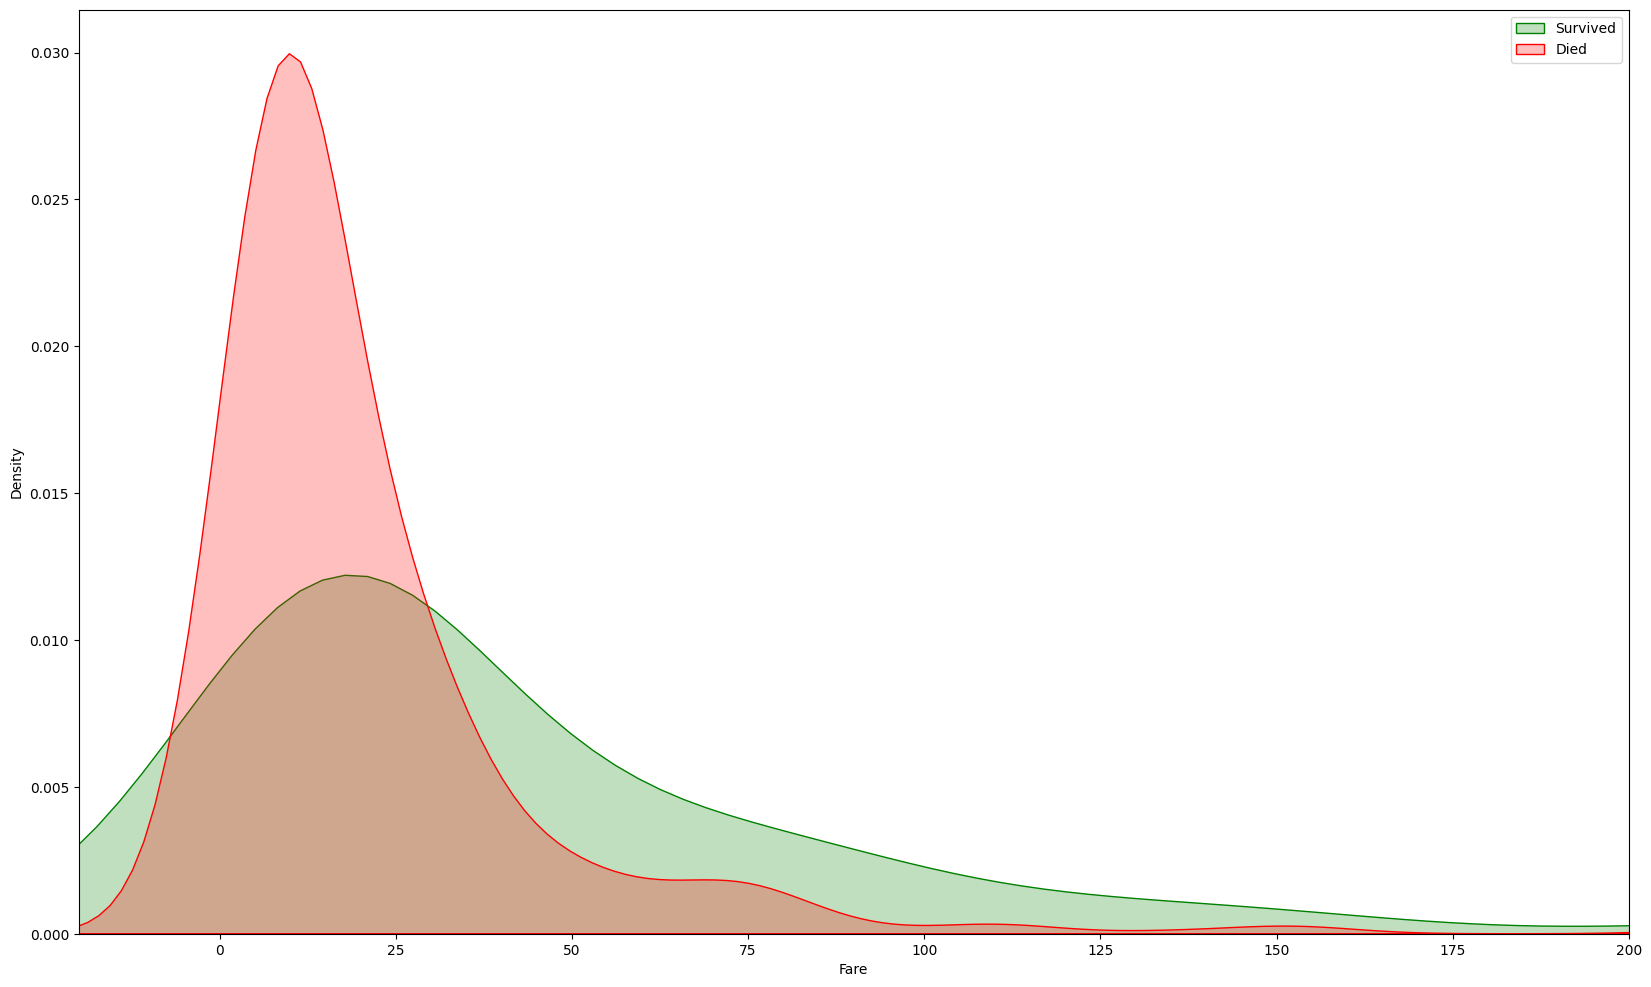

In [34]:
# FARE EDA

plt.figure(figsize=(20,12))
sns.kdeplot(df['Fare'][df.Survived==1],color='green',fill=True)
sns.kdeplot(df['Fare'][df.Survived==0],color='red',fill=True)
plt.legend(['Survived','Died'])
plt.xlim(-20,200)
plt.show()

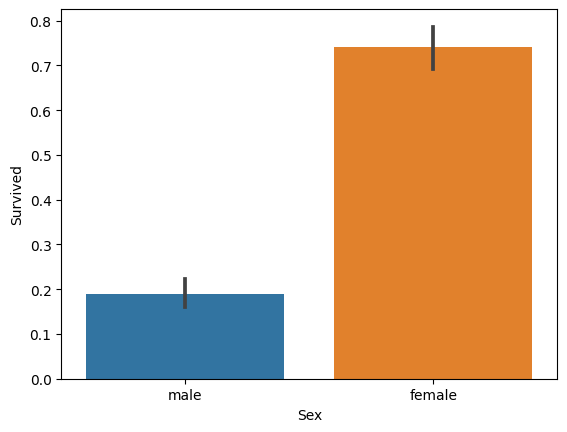

In [35]:
# Sex EDA
sns.barplot(x='Sex',y='Survived',data=df)
plt.show()

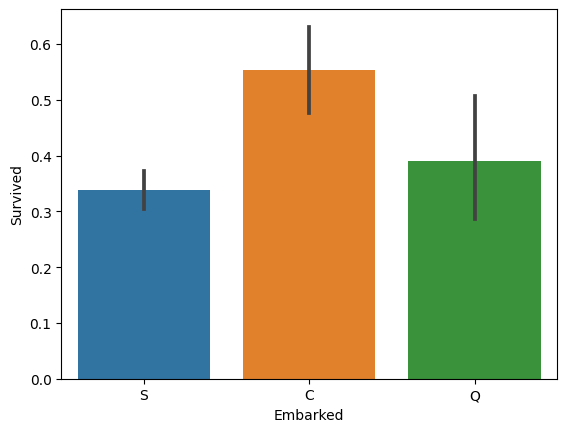

In [36]:
# Embarked EDA
sns.barplot(x='Embarked',y='Survived',data=df)
plt.show()

In [37]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeBin           0
dtype: int64


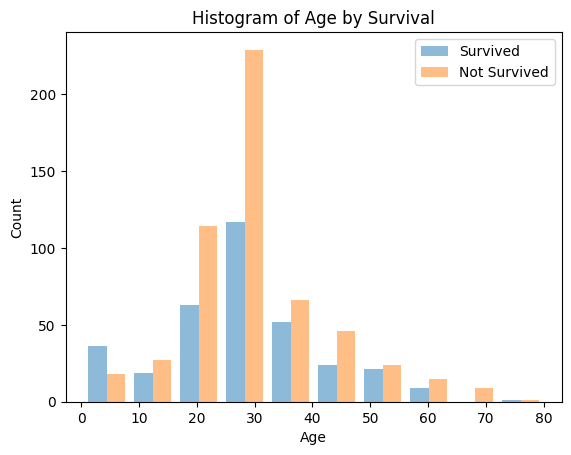

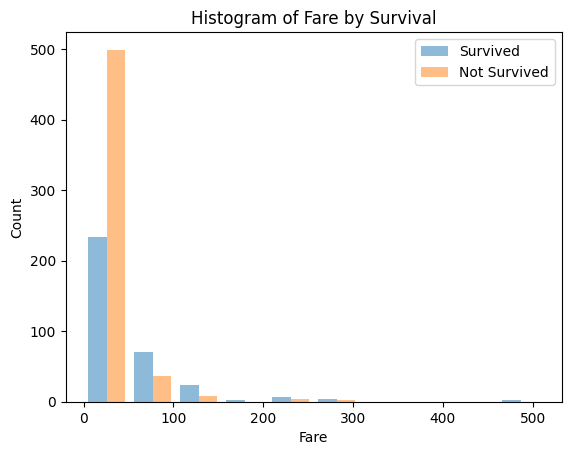

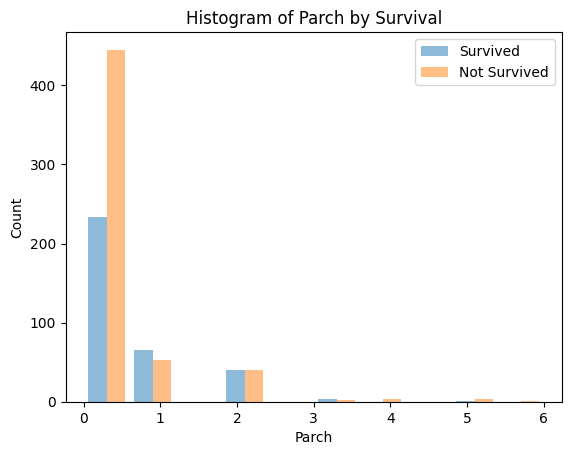

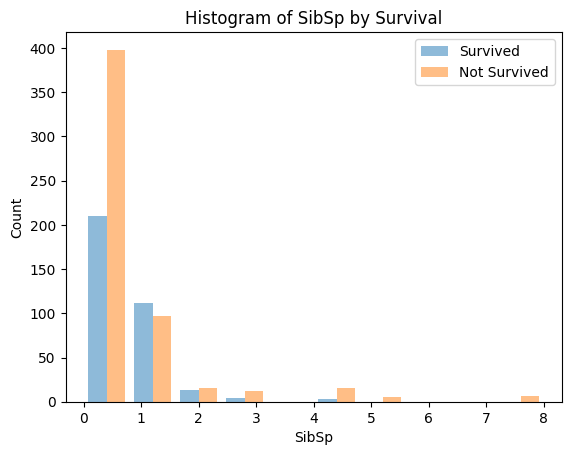

In [38]:
features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in features:
    survived = df[df['Survived'] == 1][feature]
    not_survived = df[df['Survived'] == 0][feature]
    plt.hist([survived, not_survived], bins=10, alpha=0.5, label=['Survived', 'Not Survived'])
    plt.legend(loc='upper right')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Histogram of ' + feature + ' by Survival')
    plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


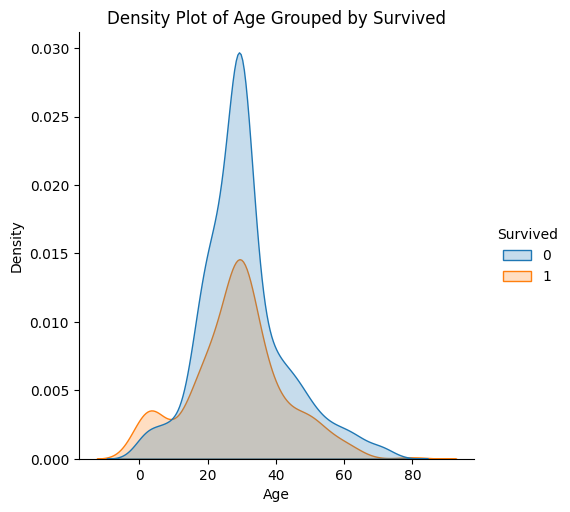

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


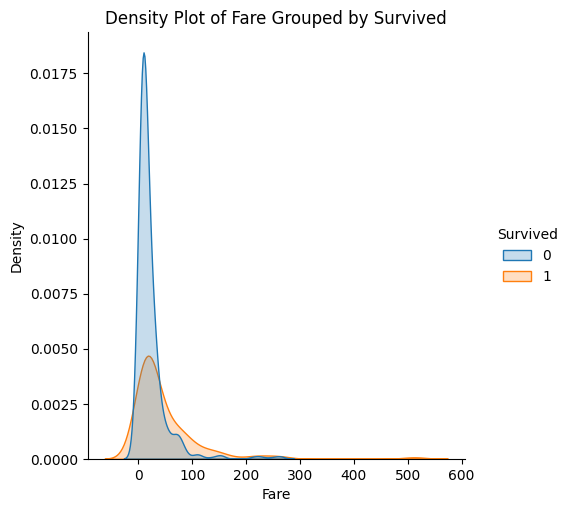

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


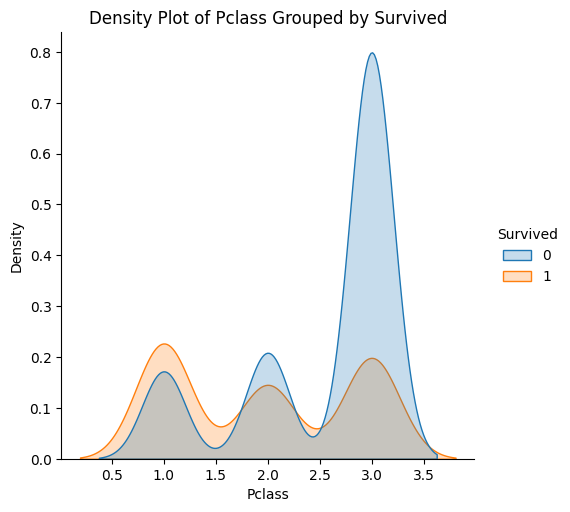

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


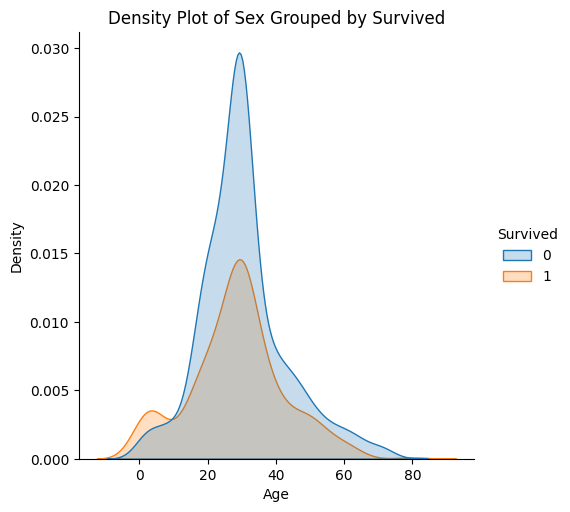

In [39]:
# Density plots of every feature grouped by class label
sns.displot(df, x='Age', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Age Grouped by Survived')
plt.show()

sns.displot(df, x='Fare', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Fare Grouped by Survived')
plt.show()

sns.displot(df, x='Pclass', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Pclass Grouped by Survived')
plt.show()

sns.displot(df, x='Age', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Sex Grouped by Survived')
plt.show()

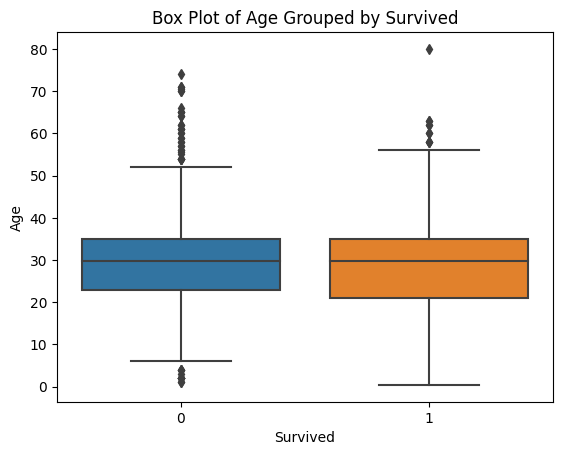

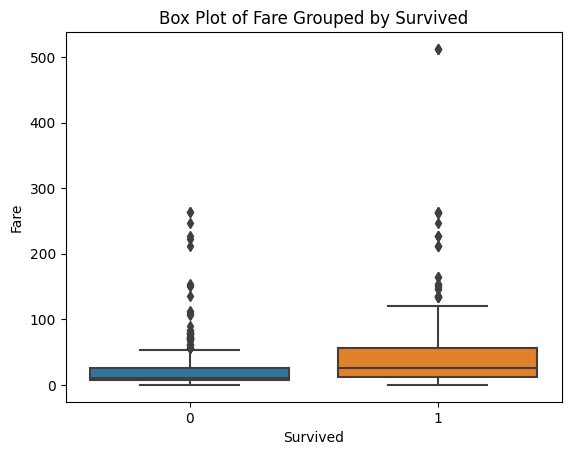

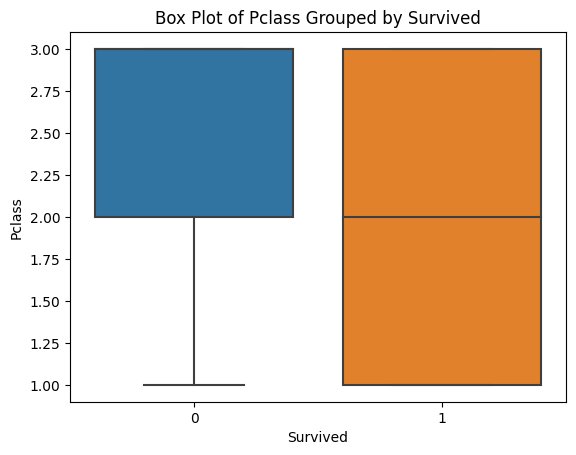

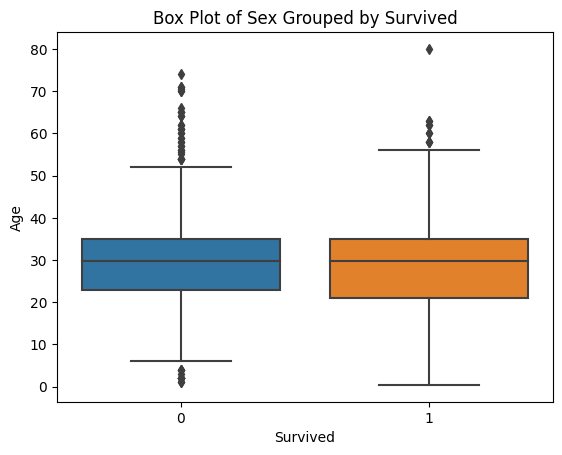

In [40]:
# Box plot for every feature
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Box Plot of Age Grouped by Survived')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Box Plot of Fare Grouped by Survived')
plt.show()

sns.boxplot(x='Survived', y='Pclass', data=df)
plt.title('Box Plot of Pclass Grouped by Survived')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Box Plot of Sex Grouped by Survived')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


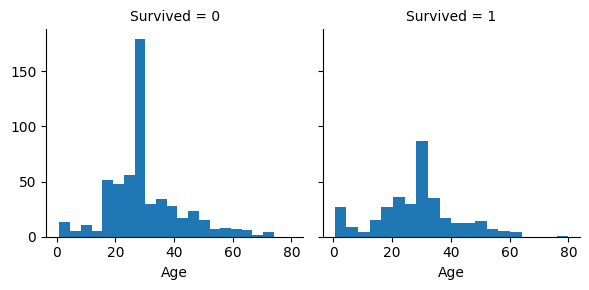

In [41]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


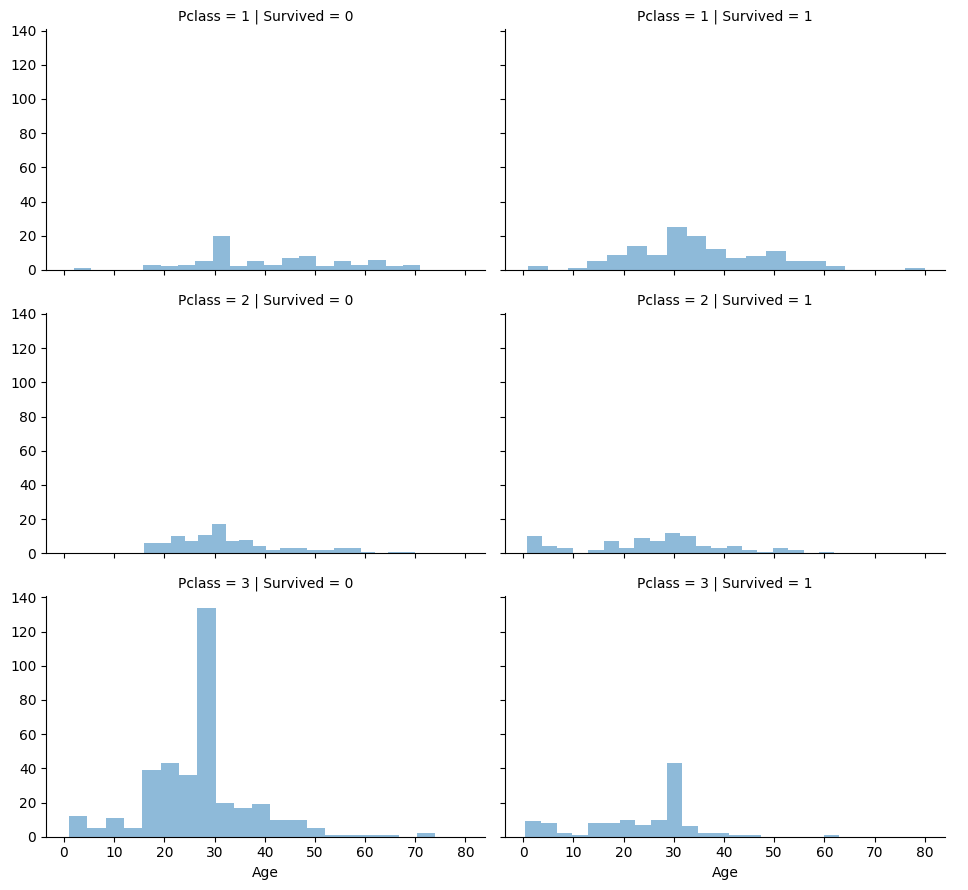

In [42]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


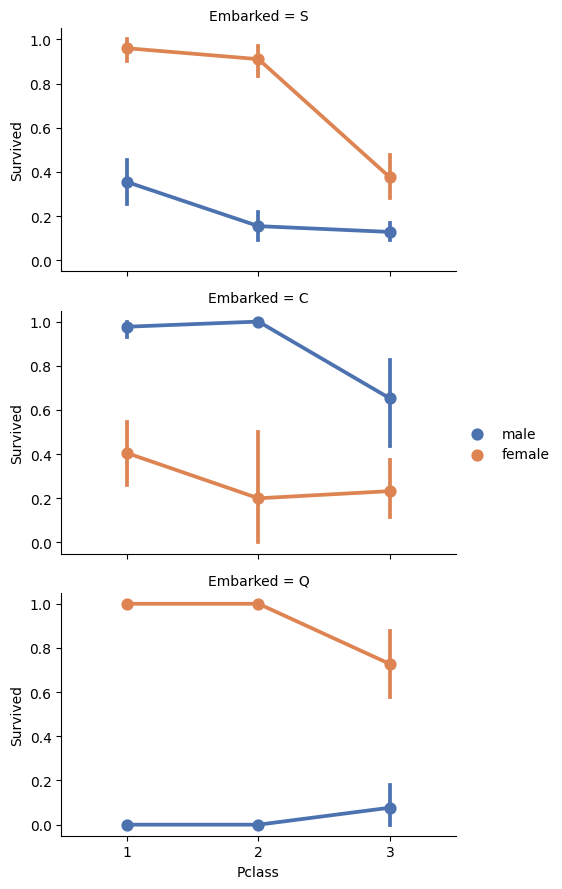

In [43]:
grid = sns.FacetGrid(df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarnin

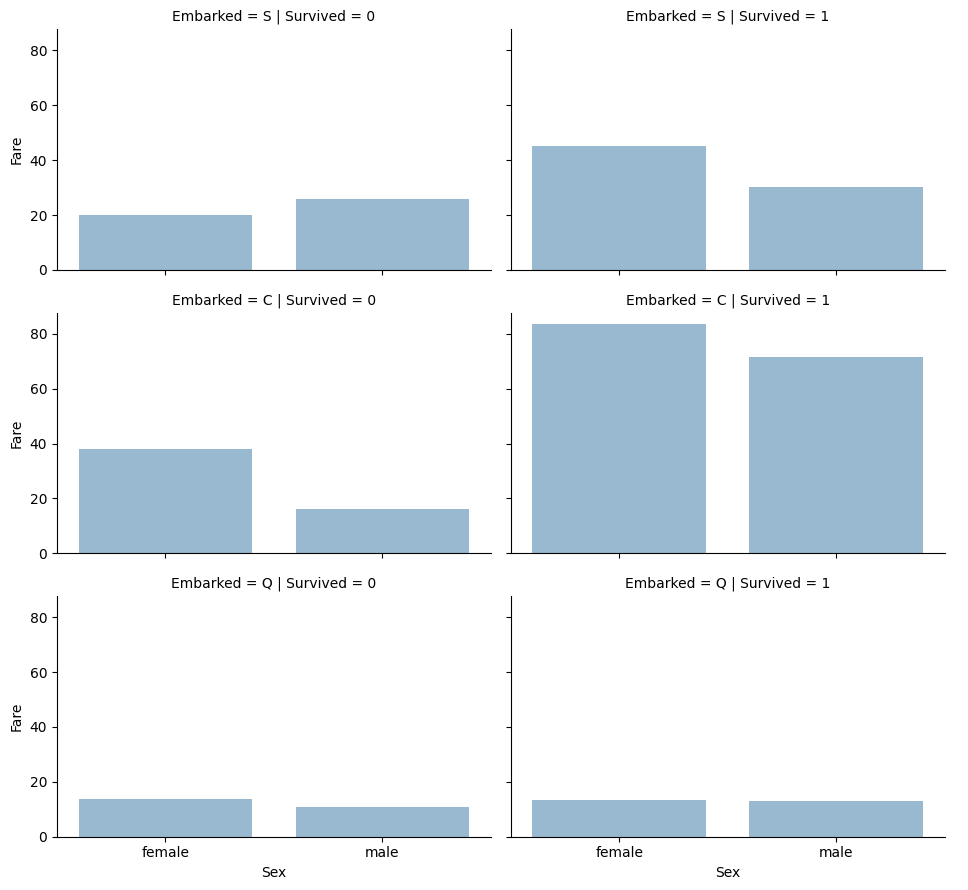

In [44]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


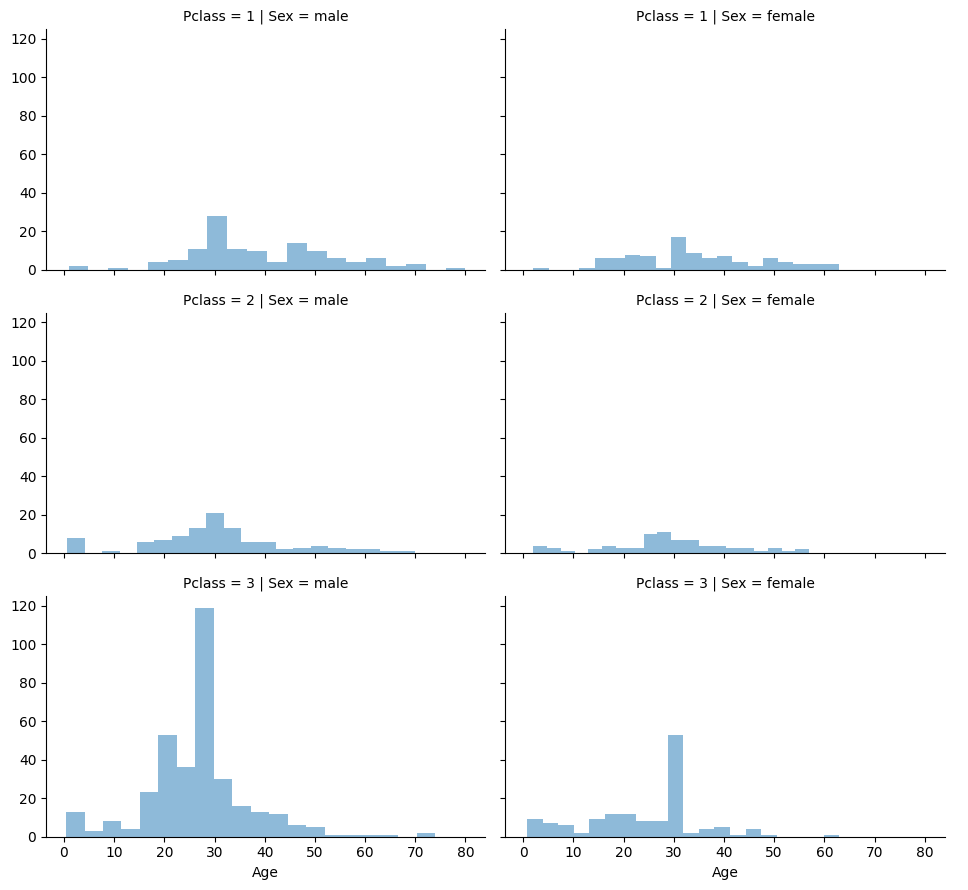

In [45]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

<function matplotlib.pyplot.show(close=None, block=None)>

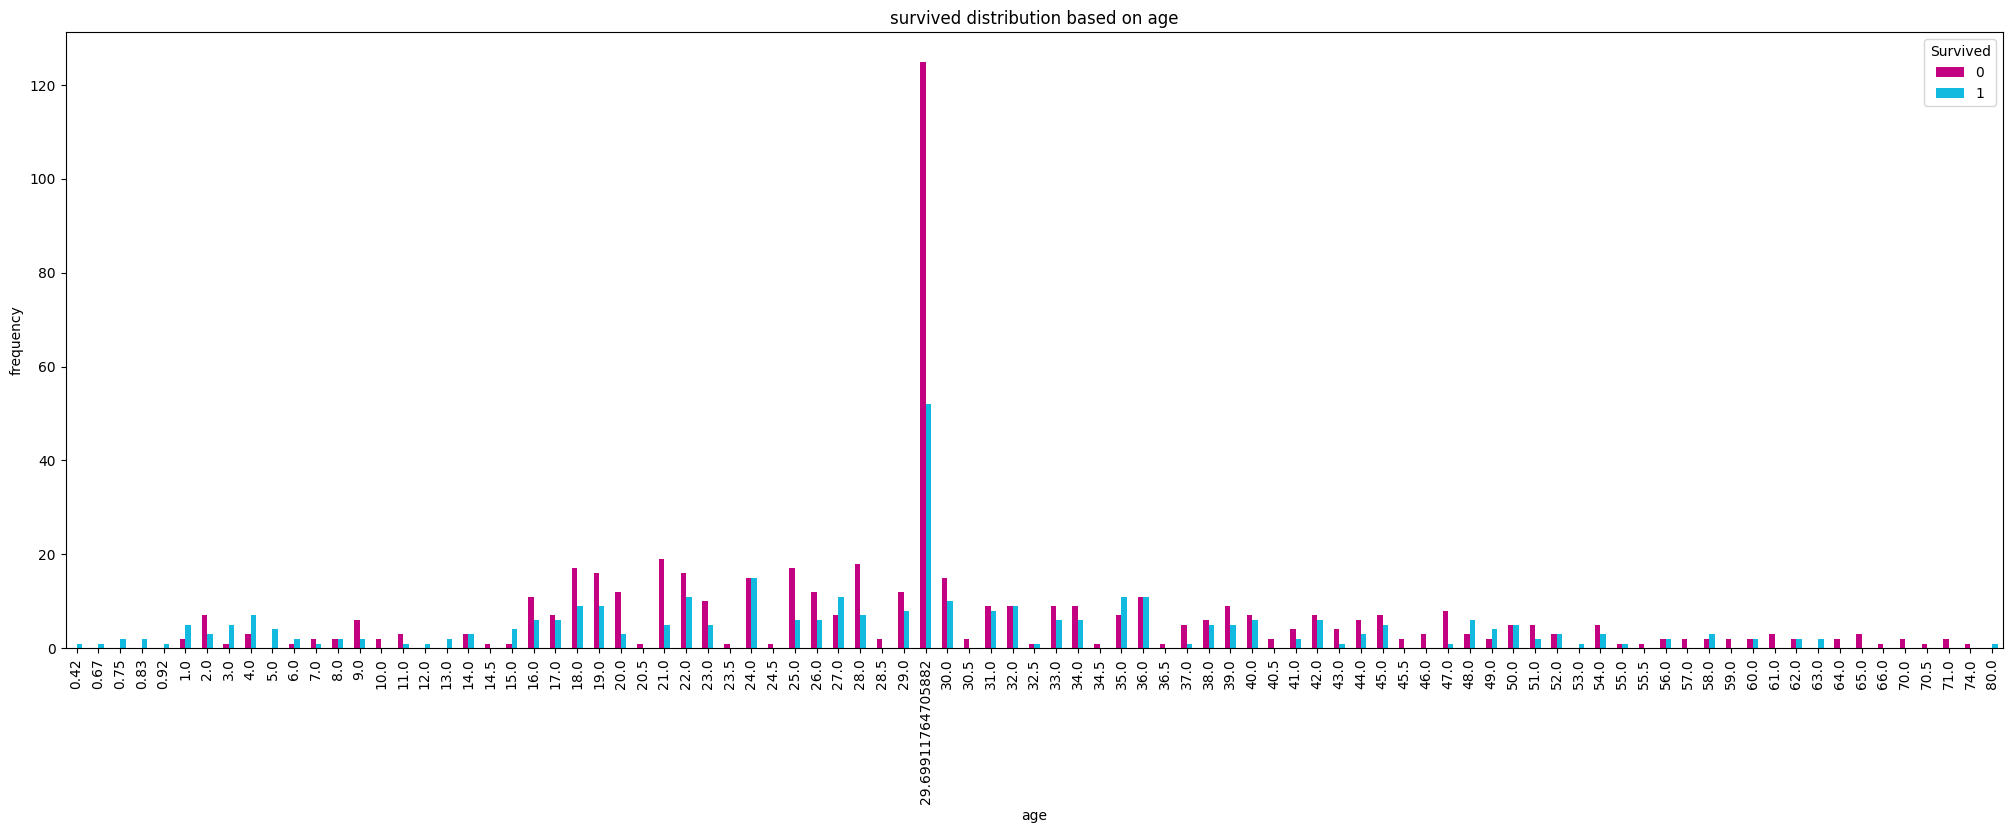

In [46]:
import pandas as pd
# survived distribution based on age
pd.crosstab(df.Age,df.Survived).plot(kind="bar",figsize=(25,8), color=['#C30281','#13BADF'])
plt.title("survived distribution based on age")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show

<Axes: xlabel='Sex', ylabel='Age'>

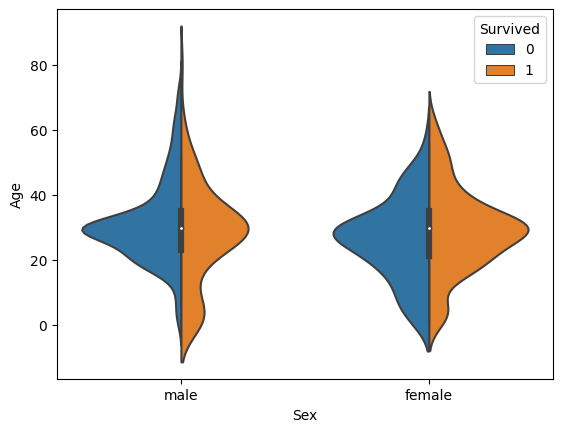

In [48]:
# See Survived or Not Age diagram
# Violinplot shows how data is distributed 
# Spanning a category's whole hierarchy
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True)

In [50]:
# See Survived Family Diagram

# Adding a column for the size of the family
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
 
# Adding a column labeled "Alone"
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1
 
# Families Size Factorplot
sns.factorplot(x ='Family_Size', y ='Survived', data = df)
 
# Families Size Factorplot
sns.factorplot(x ='Alone', y ='Survived', data = df)

AttributeError: module 'seaborn' has no attribute 'factorplot'

<Axes: xlabel='Fare Range', ylabel='Survived'>

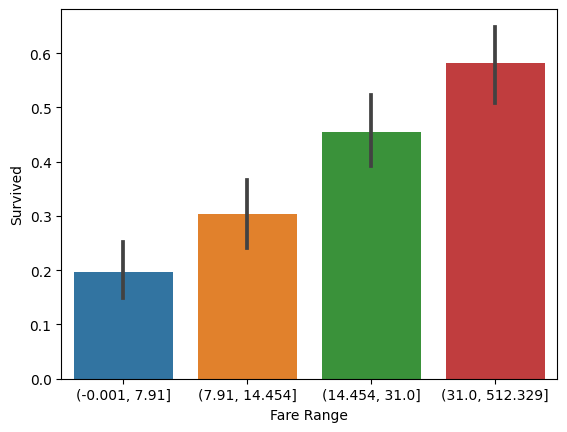

In [51]:
# See Fare Range Diagram
# Separate the fare into four bins.
df['Fare Range'] = pd.qcut(df['Fare'], 4)
 
# Barplot - Displays approximate values depending on the data.
# on the bar's height
sns.barplot(x ='Fare Range', y ='Survived',data = df)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


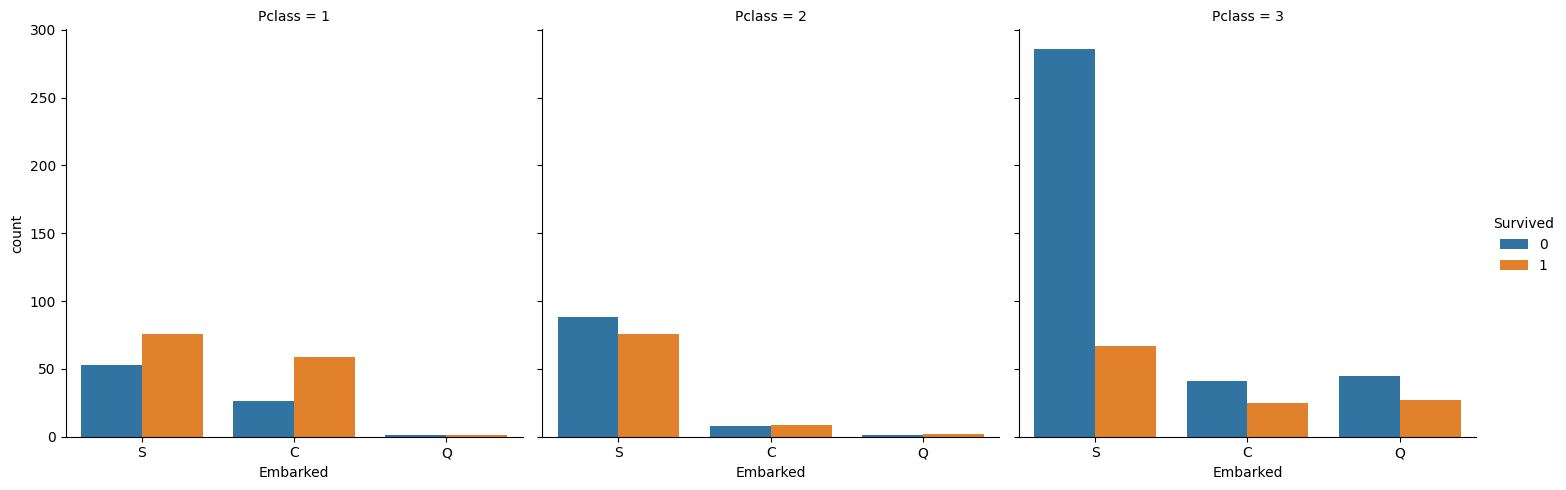

In [52]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

In [53]:
f,ax=pd.subplots(1,2,figsize=(18,8))
sns.swarmplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0],palette='Set2')
ax[0].set_title('Pclass and Age vs Survived Result')
ax[0].set_yticks(range(0,110,10))
sns.swarmplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1],palette='Set2')
ax[1].set_title('Sex and Age vs Survived Result')
ax[1].set_yticks(range(0,110,10))
plt.show()

AttributeError: module 'pandas' has no attribute 'subplots'